In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage

# Quick EDA

In [2]:
df=pd.read_csv('/kaggle/input/lab6dataset/tsne_scores.csv')
df.head()

,t-SNE-1,t-SNE-2
0,10.846841,-16.712580
1,24.794334,-16.775398
2,2.953309,13.379048
3,27.262146,-31.886690
4,-23.015728,64.468376


In [3]:
df.tail()

,t-SNE-1,t-SNE-2
4401,-15.211057,-69.717155
4402,-9.403443,-62.847458
4403,-17.546083,-10.295582
4404,-8.512799,16.375420
4405,-17.493050,-2.631812


In [4]:
df.shape

(4406, 2)

In [5]:
df=df.iloc[:,[0,1]].values

Text(0.5, 1.0, 'I can tell from the visualization that i have 8/9 clusters ')

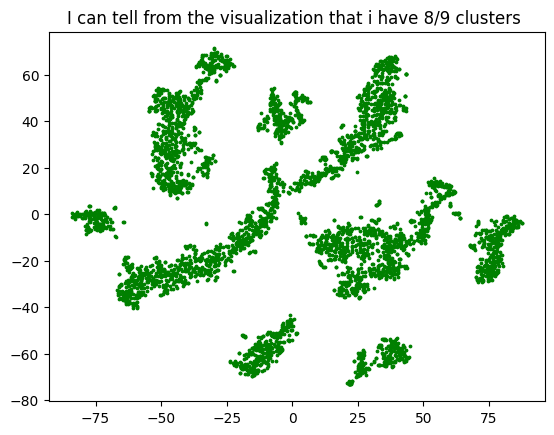

In [6]:
#for basic visualization only
plt.scatter(df[:,0],df[:,1], s=3,c='green')
plt.title('I can tell from the visualization that i have 8/9 clusters ')

# Q1.1
1.	Compute required parameters (MinPts, eps) for DBSCAN clustering as illustrated in lab4 notebook 

a.	Since you have 2 dimensionality in the dataset, what is the value of MinPts should be?

In [32]:
#value of minimum points=number of dimensions *2
MinPts = 4

b.	Based on your choice of MinPts, use the kth Nearest Neighbors to find the optimal value for eps (make the k value as (MinPts+1)).

In [33]:
k = MinPts + 1
# Fitting the kth Nearest Neighbors to the data
knn = NearestNeighbors(n_neighbors=k)
knn.fit(df)

NearestNeighbors()

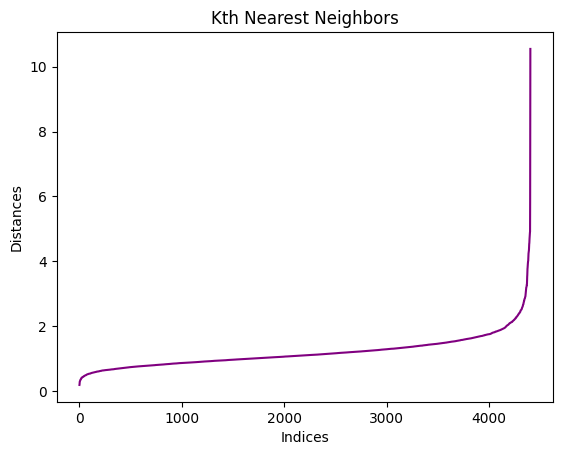

In [34]:
# Finding the distance 'epsilon' to the kth nearest neighbor for each point
distances, _ = knn.kneighbors(df)
kth_distances = distances[:, -1]

# Sort the distances in ascending order
sorted_distances = np.sort(kth_distances)

# Plot the sorted distances to identify the knee/elbow point
import matplotlib.pyplot as plt
plt.plot(np.arange(len(sorted_distances)), sorted_distances,color='purple')
plt.xlabel('Indices')
plt.ylabel('Distances')
plt.title('Kth Nearest Neighbors')
plt.show()

# Q1.2
2.	Pass the calculated parameters to the DBSCAN to predict the clusters using the sklearn.cluster.DBSCAN class.

In [35]:

# Calculate the parameters: MinPts and eps
eps = 4.5
# Instantiate the DBSCAN object with the calculated parameters
dbscan = DBSCAN(eps=eps, min_samples=MinPts)

# Fit the DBSCAN model to the data and predict the clusters
labels = dbscan.fit_predict(df)

# Access the cluster labels assigned by DBSCAN
unique_labels = np.unique(labels)

# Print the number of clusters found by DBSCAN (excluding noise points)
num_clusters = len(unique_labels) - 1
print("Number of clusters:", num_clusters)

# Print the cluster labels assigned to each data point
#for i, label in enumerate(labels):
#    print("Data point", i, "is assigned to cluster", label)

Number of clusters: 11


# Q1.3
3.	Visualize the cluster as a scatter plot and color the clusters using predicted class labels.

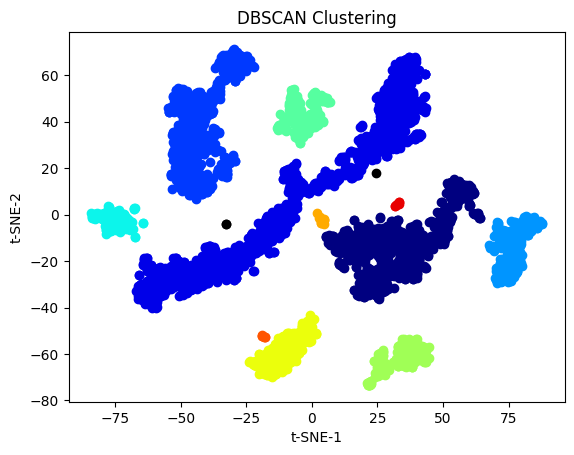

In [36]:
# Plot the clusters
for label in unique_labels:
    if label == -1:
        # Noise points are plotted in black
        color = 'black'
    else:
        # Assign a unique color to each cluster
        color = plt.cm.jet(label / (len(unique_labels) - 1))
    cluster_points = df[labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=color, label=label)

plt.xlabel('t-SNE-1')
plt.ylabel('t-SNE-2')
plt.title('DBSCAN Clustering')
plt.show()

# Q2.1
1.	Using the same dataset question1, apply kmeans and hierarchal clustering (ward method)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


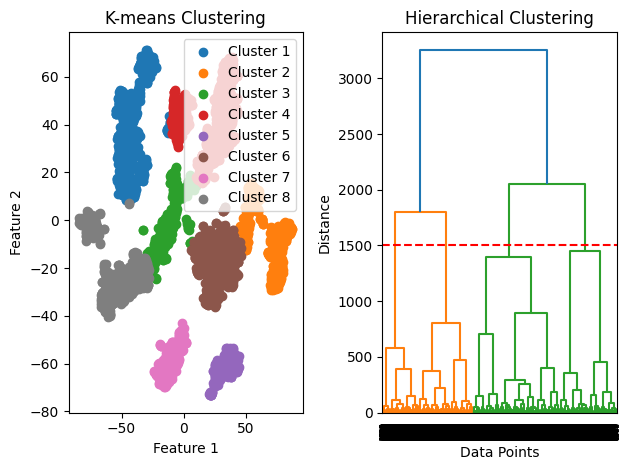

In [37]:
# Perform K-means clustering
kmeans = KMeans()
kmeans_labels = kmeans.fit_predict(df)
num_clusters = len(np.unique(kmeans_labels))

# Perform hierarchical clustering using the Ward method
Z = linkage(df, method='ward')

# Plot the K-means clusters
plt.subplot(1, 2, 1)
for label in range(num_clusters):
    cluster_points = df[kmeans_labels == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {label+1}")

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.legend()

# Plot the dendrogram for hierarchical clustering
plt.subplot(1, 2, 2)
dendrogram(Z)
plt.title('Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')

# Draw a line for the best cut
best_cut = 1500  # Adjust this value based on your desired cut
plt.axhline(y=best_cut, color='r', linestyle='--')

plt.tight_layout()
plt.show()

# Q2.2
2.	Apply elbow method and show dendrogram to choose the best value for the number of clusters.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

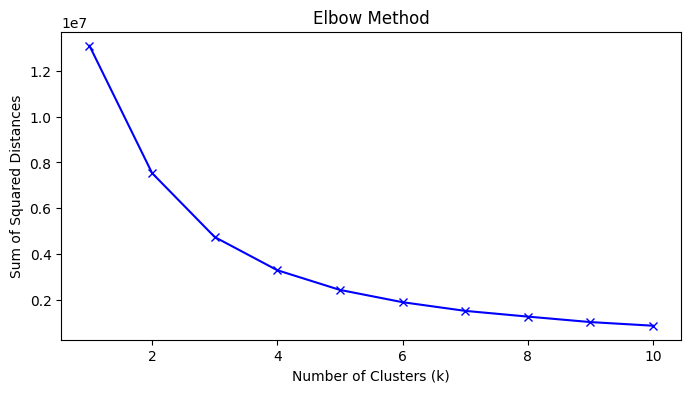

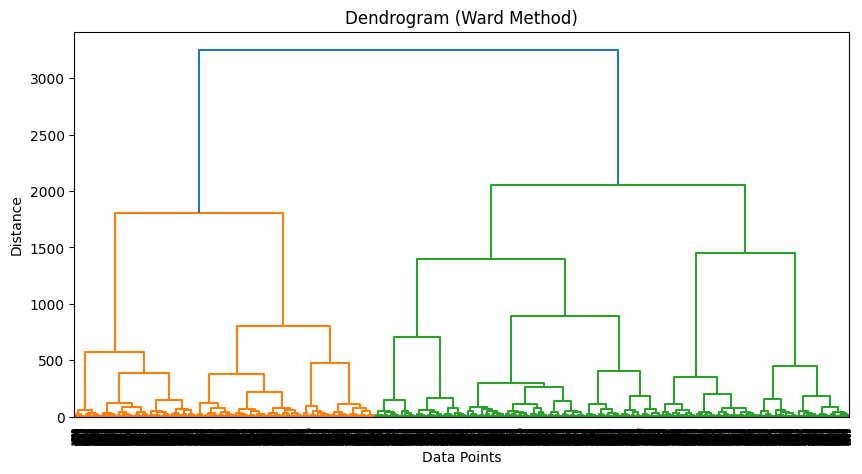

In [38]:
# Elbow Method: Calculate the sum of squared distances for different values of k
sse = []
k_values = range(1, 11)  # Test values of k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_values, sse, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

# Perform hierarchical clustering using the Ward method
Z = linkage(df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram (Ward Method)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Q2.3
3.	Compare the clustering results of kmeans and hierarchal clustering to DBSCAN’s results. 

# The DBSACN has 11 clusters, the Kmean and Hierarchical have 8 clusters wich is less